In [1]:
import pandas as pd

# Load the dataset
file_path = "Supermart Grocery Sales - Retail Analytics Dataset.csv"  # Ensure the dataset is in the same folder
data = pd.read_csv(file_path)

# Display basic information
print("Dataset Loaded Successfully!")
data.info()
data.head()


Dataset Loaded Successfully!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
 10  State          9994 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.0+ KB


,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu


In [29]:
import pandas as pd

df = pd.read_csv("Supermart Grocery Sales - Retail Analytics Dataset.csv")  # Replace with your actual file name


In [2]:
# Convert 'Order Date' to datetime format
data['Order Date'] = pd.to_datetime(data['Order Date'], errors='coerce')

# Extract day, month, and year from 'Order Date'
data['Order Day'] = data['Order Date'].dt.day
data['Order Month'] = data['Order Date'].dt.month
data['Order Year'] = data['Order Date'].dt.year

# Check for duplicate rows
duplicate_count = data.duplicated().sum()

# Display updated dataset structure and duplicate count
print("Updated Dataset Info:")
data.info()

print(f"\nNumber of Duplicate Rows: {duplicate_count}")


Updated Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9994 non-null   object        
 1   Customer Name  9994 non-null   object        
 2   Category       9994 non-null   object        
 3   Sub Category   9994 non-null   object        
 4   City           9994 non-null   object        
 5   Order Date     4042 non-null   datetime64[ns]
 6   Region         9994 non-null   object        
 7   Sales          9994 non-null   int64         
 8   Discount       9994 non-null   float64       
 9   Profit         9994 non-null   float64       
 10  State          9994 non-null   object        
 11  Order Day      4042 non-null   float64       
 12  Order Month    4042 non-null   float64       
 13  Order Year     4042 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object

C:\Users\niyut\AppData\Local\Temp\ipykernel_5972\3519668277.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y='Sales', data=data, palette='Set2')


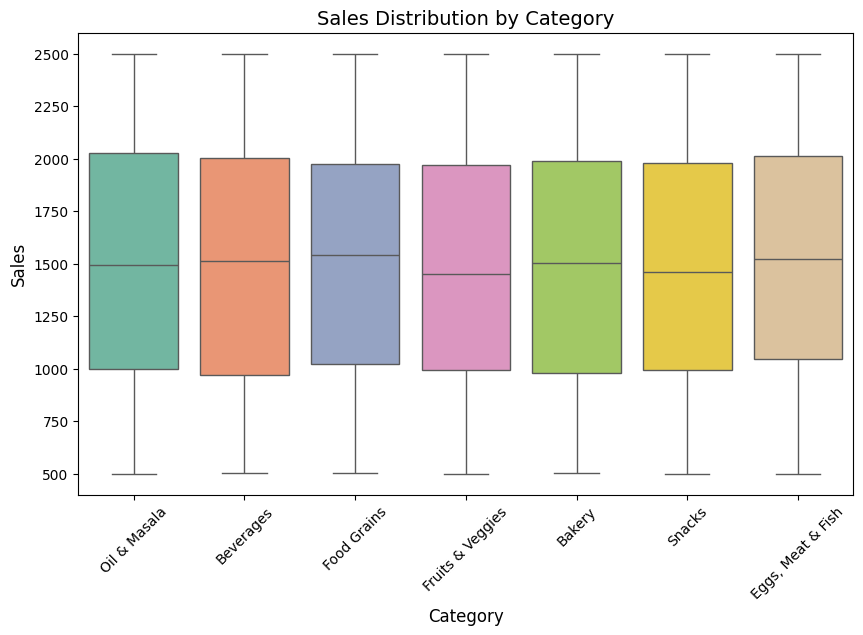

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size
plt.figure(figsize=(10, 6))

# Create a boxplot for Sales distribution by Category
sns.boxplot(x='Category', y='Sales', data=data, palette='Set2')

# Add title and labels
plt.title('Sales Distribution by Category', fontsize=14)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Sales', fontsize=12)

# Show plot
plt.xticks(rotation=45)
plt.show()


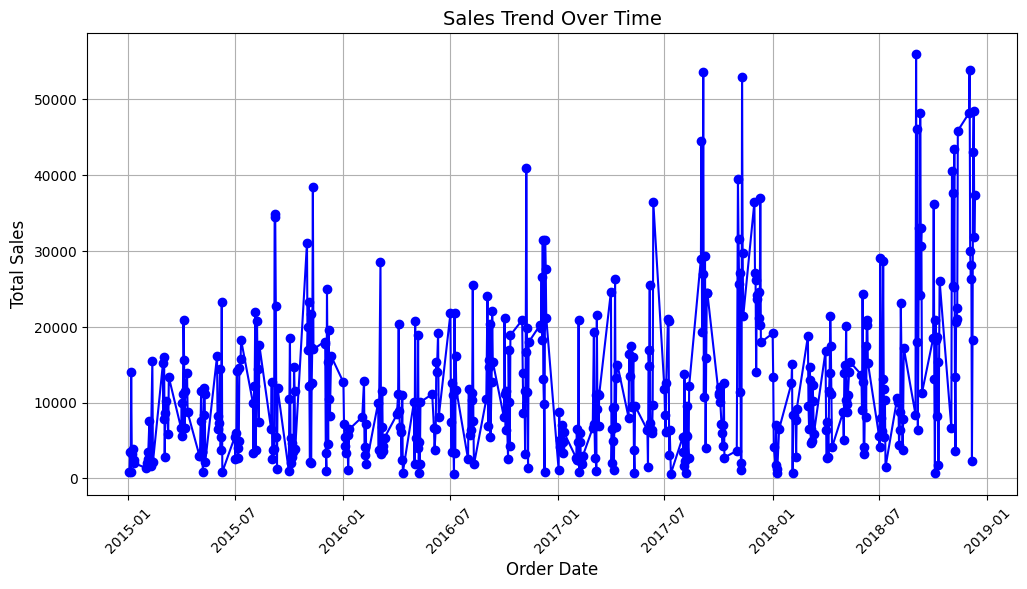

In [4]:
# Group sales by date
sales_trend = data.groupby('Order Date')['Sales'].sum()

# Plot sales trend
plt.figure(figsize=(12, 6))
plt.plot(sales_trend.index, sales_trend.values, marker='o', linestyle='-', color='b')

# Add title and labels
plt.title('Sales Trend Over Time', fontsize=14)
plt.xlabel('Order Date', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.grid(True)
plt.show()


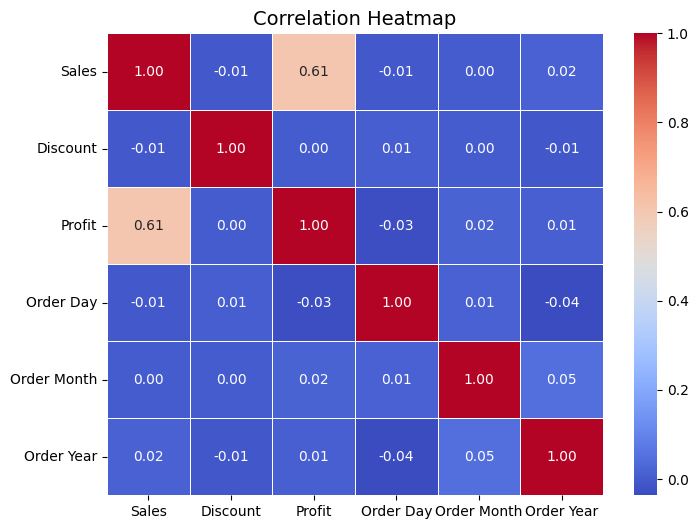

In [5]:
# Select only numeric columns
numeric_data = data.select_dtypes(include=['number'])

# Generate correlation matrix
corr_matrix = numeric_data.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Add title
plt.title('Correlation Heatmap', fontsize=14)

# Show plot
plt.show()


In [6]:
from sklearn.preprocessing import LabelEncoder

# Select categorical columns
categorical_cols = ['Category', 'Sub Category', 'City', 'State', 'Region']

# Apply Label Encoding
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le  # Store encoders for future use

# Check updated dataset
print(data.head())


  Order ID Customer Name  Category  Sub Category  City Order Date  Region  \
0      OD1        Harish         5            14    21 2017-11-08       2   
1      OD2         Sudha         1            13     8 2017-11-08       3   
2      OD3       Hussain         3             0    13 2017-06-12       4   
3      OD4       Jackson         4            12     4 2016-10-11       3   
4      OD5       Ridhesh         3            18    12 2016-10-11       3   

   Sales  Discount  Profit  State  Order Day  Order Month  Order Year  
0   1254      0.12  401.28      0        8.0         11.0      2017.0  
1    749      0.18  149.80      0        8.0         11.0      2017.0  
2   2360      0.21  165.20      0       12.0          6.0      2017.0  
3    896      0.25   89.60      0       11.0         10.0      2016.0  
4   2355      0.26  918.45      0       11.0         10.0      2016.0  


In [7]:
# Checking for missing values
missing_values = data.isnull().sum()
missing_values = missing_values[missing_values > 0]  # Show only columns with missing values

if missing_values.empty:
    print("✅ No missing values found in the dataset!")
else:
    print("⚠️ Missing values detected:")
    print(missing_values)


⚠️ Missing values detected:
Order Date     5952
Order Day      5952
Order Month    5952
Order Year     5952
dtype: int64


In [8]:
print(f"Total rows: {len(data)}")


Total rows: 9994


In [9]:
data['Order Date'] = pd.to_datetime(data['Order Date'], errors='coerce')


In [10]:
# Calculate the most frequent (mode) date in the dataset
most_frequent_date = data['Order Date'].mode()[0]

# Now, fill missing values with the most frequent date
data['Order Date'] = data['Order Date'].fillna(most_frequent_date)


In [11]:
data['Order Day'] = data['Order Date'].dt.day
data['Order Month'] = data['Order Date'].dt.month
data['Order Year'] = data['Order Date'].dt.year


In [12]:
print(data.isnull().sum())  # Should now show 0 missing values


Order ID         0
Customer Name    0
Category         0
Sub Category     0
City             0
Order Date       0
Region           0
Sales            0
Discount         0
Profit           0
State            0
Order Day        0
Order Month      0
Order Year       0
dtype: int64


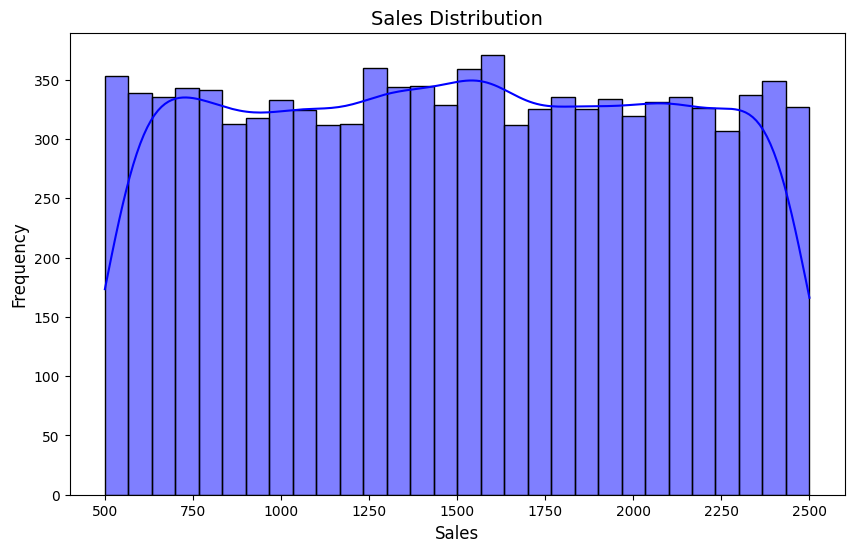

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Sales'], bins=30, kde=True, color='blue')

plt.title('Sales Distribution', fontsize=14)
plt.xlabel('Sales', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.show()


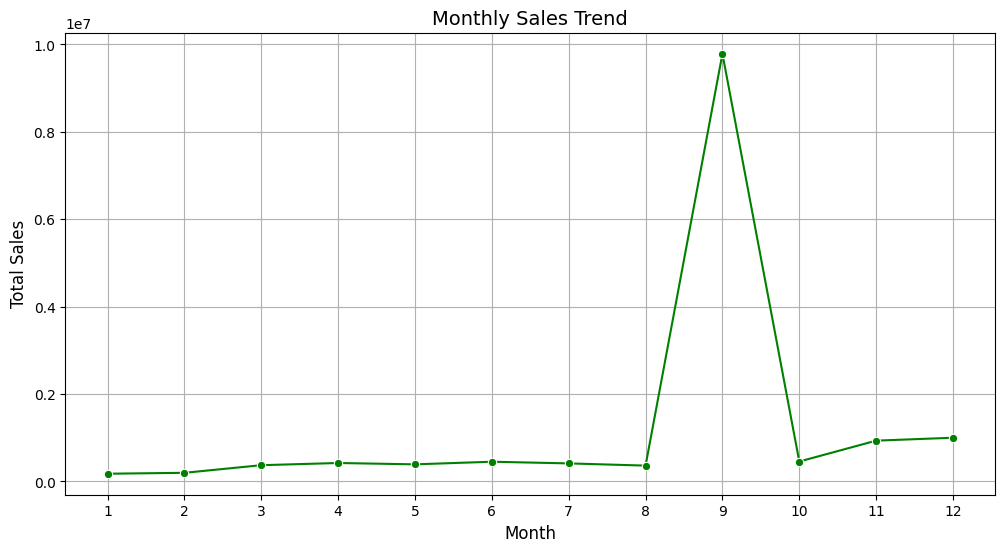

In [14]:
plt.figure(figsize=(12, 6))
monthly_sales = data.groupby('Order Month')['Sales'].sum()

sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker='o', color='green')

plt.title('Monthly Sales Trend', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(range(1, 13))  # Ensuring all months appear
plt.grid()

plt.show()


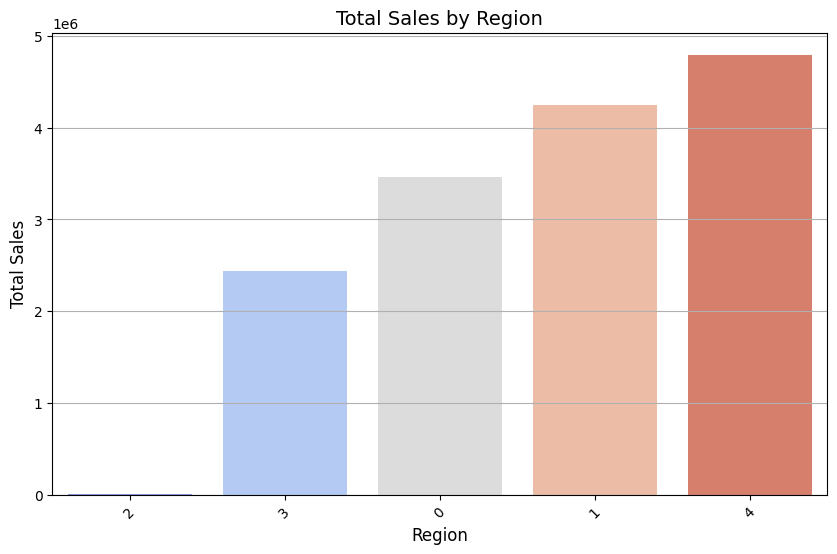

In [15]:
plt.figure(figsize=(10, 6))

region_sales = data.groupby('Region')['Sales'].sum().sort_values()

# Assign hue to x variable and disable legend
sns.barplot(x=region_sales.index.astype(str), y=region_sales.values, hue=region_sales.index.astype(str), palette='coolwarm', legend=False)

plt.title('Total Sales by Region', fontsize=14)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.show()


In [16]:
print(region_sales)



Region
2       1254
3    2440461
0    3468156
1    4248368
4    4798743
Name: Sales, dtype: int64


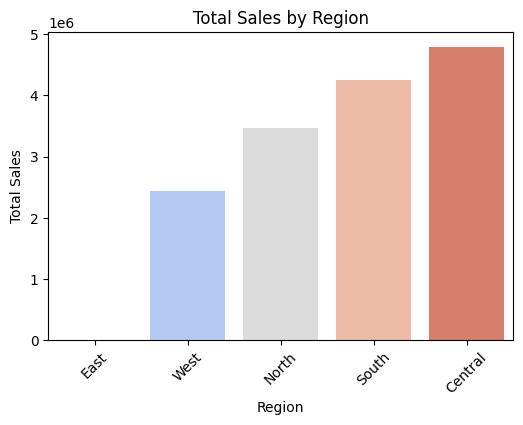

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample sales data with numerical region indices
region_sales = pd.Series(
    {
        2: 1254,
        3: 2440461,
        0: 3468156,
        1: 4248368,
        4: 4798743
    }, 
    name="Sales"
)

# Mapping numbers to region names
region_mapping = {0: "North", 1: "South", 2: "East", 3: "West", 4: "Central"}
region_sales.index = region_sales.index.map(region_mapping)  # Apply mapping

# Seaborn bar plot with updated syntax
plt.figure(figsize=(6, 4))
sns.barplot(x=region_sales.index, y=region_sales.values, hue=region_sales.index, palette='coolwarm', legend=False)

# Labeling the chart
plt.xlabel("Region")
plt.ylabel("Total Sales")
plt.title("Total Sales by Region")
plt.xticks(rotation=45)  # Rotate labels if needed

# Show plot
plt.show()


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Drop unnecessary columns
features = data.drop(columns=['Order ID', 'Customer Name', 'Order Date', 'Sales'])

# Define target variable
target = data['Sales']

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Apply feature scaling for better model performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Print dataset shapes
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((7995, 10), (1999, 10), (7995,), (1999,))

In [19]:
from sklearn.linear_model import LinearRegression

# Initialize Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on test data
y_pred = model.predict(X_test)

print("✅ Model training completed!")


✅ Model training completed!


In [20]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate MSE and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print results
print(f"🔹 Mean Squared Error (MSE): {mse:.2f}")
print(f"🔹 R-squared (R²) Score: {r2:.4f}")


🔹 Mean Squared Error (MSE): 212717.05
🔹 R-squared (R²) Score: 0.3550


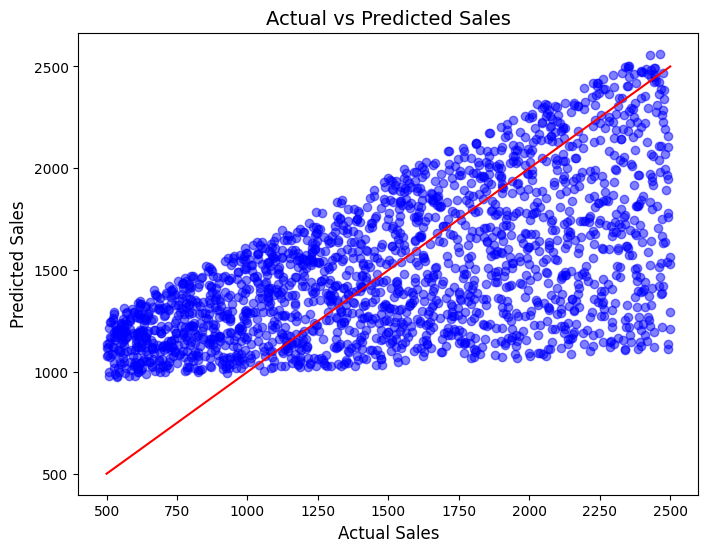

In [21]:
import matplotlib.pyplot as plt

# Plot actual vs predicted sales
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color="blue")  # Scatter plot
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Ideal fit line

# Labels & Title
plt.title('Actual vs Predicted Sales', fontsize=14)
plt.xlabel('Actual Sales', fontsize=12)
plt.ylabel('Predicted Sales', fontsize=12)

plt.show()


In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Calculate error metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print results
print("Model Performance Metrics:")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")


Model Performance Metrics:
MAE: 379.03
RMSE: 461.21
R² Score: 0.3550


In [26]:
# Check if X is defined
try:
    print(X.head())  # If X is a DataFrame, this should work
except NameError:
    print("Variable X is not defined. Make sure you have defined it before splitting the data.")



Variable X is not defined. Make sure you have defined it before splitting the data.


In [31]:
df.head()  # View the first 5 rows
df.columns  # View all column names


Index(['Order ID', 'Customer Name', 'Category', 'Sub Category', 'City',
       'Order Date', 'Region', 'Sales', 'Discount', 'Profit', 'State'],
      dtype='object')

In [32]:
X = df.drop(columns=['Sales'])  # Drop the target column
y = df['Sales']  # Target column


In [33]:
X = X.drop(columns=['Order ID', 'Customer Name', 'Order Date'])


In [34]:
X = pd.get_dummies(X, drop_first=True)


In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [36]:
from sklearn.ensemble import RandomForestRegressor

# Initialize model
rf_model = RandomForestRegressor(n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_depth=10, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)


In [37]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R² Score: {r2:.4f}")


Mean Absolute Error (MAE): 377.0531
Mean Squared Error (MSE): 211875.3032
R² Score: 0.3576


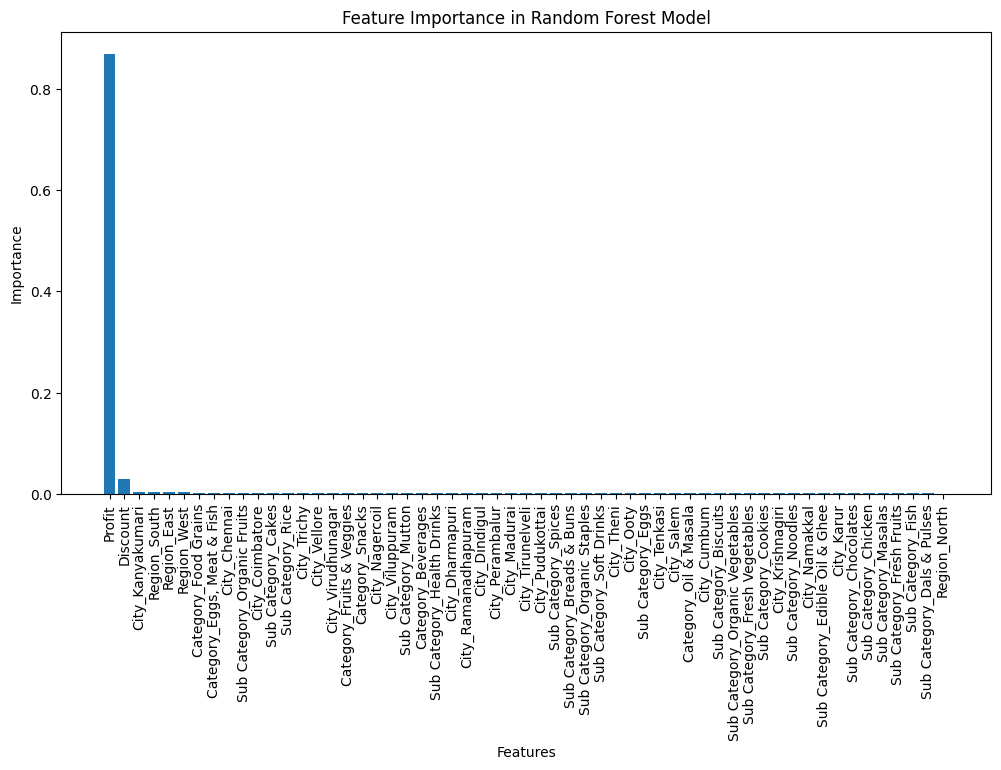

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame for feature importances
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 6))
plt.bar(feature_importances['Feature'], feature_importances['Importance'])
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance in Random Forest Model')
plt.show()


In [48]:
print(df.columns)  # Check original dataset column names


Index(['Order ID', 'Customer Name', 'Category', 'Sub Category', 'City',
       'Order Date', 'Region', 'Sales', 'Discount', 'Profit', 'State',
       'Sales_per_Discount', 'Profit_Margin', 'Region_Code'],
      dtype='object')


In [49]:
print(X_train.columns)  # Check what’s actually inside X_train



Index(['Discount', 'Profit', 'Category_Beverages',
       'Category_Eggs, Meat & Fish', 'Category_Food Grains',
       'Category_Fruits & Veggies', 'Category_Oil & Masala', 'Category_Snacks',
       'Sub Category_Biscuits', 'Sub Category_Breads & Buns',
       'Sub Category_Cakes', 'Sub Category_Chicken', 'Sub Category_Chocolates',
       'Sub Category_Cookies', 'Sub Category_Dals & Pulses',
       'Sub Category_Edible Oil & Ghee', 'Sub Category_Eggs',
       'Sub Category_Fish', 'Sub Category_Fresh Fruits',
       'Sub Category_Fresh Vegetables', 'Sub Category_Health Drinks',
       'Sub Category_Masalas', 'Sub Category_Mutton', 'Sub Category_Noodles',
       'Sub Category_Organic Fruits', 'Sub Category_Organic Staples',
       'Sub Category_Organic Vegetables', 'Sub Category_Rice',
       'Sub Category_Soft Drinks', 'Sub Category_Spices', 'City_Chennai',
       'City_Coimbatore', 'City_Cumbum', 'City_Dharmapuri', 'City_Dindigul',
       'City_Kanyakumari', 'City_Karur', 'City_Krishna

In [50]:
selected_features = ["Profit", "Discount"] + [col for col in X_train.columns if col.startswith("Category_") or col.startswith("Region_")]


In [51]:
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]


In [52]:
model.fit(X_train_selected, y_train)
y_pred = model.predict(X_test_selected)


In [53]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions
y_pred = model.predict(X_test_selected)

# Evaluate performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print results
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R² Score: {r2:.4f}")


Mean Absolute Error (MAE): 379.0795
Mean Squared Error (MSE): 212495.5157
R² Score: 0.3557


In [55]:
%pip install xgboost


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.5/124.9 MB 1.3 MB/s eta 0:01:37
   ---------------------------------------- 0.8/124.9 MB 1.3 MB/s eta 0:01:33
   ---------------------------------------- 0.8/124.9 MB 1.3 MB/s eta 0:01:33
   ---------------------------------------- 1.3/124.9 MB 1.3 MB/s eta 0:01:38
    --------------------------------------- 1.6/124.9 MB 1.3 MB/s eta 0:01:36
    --------------------------------------- 1.8/124.9 MB 1.3 MB/s eta 0:01:36
    --------------------------------------- 1.8/124.9 MB 1.3 MB/s eta 0:01:36
    --------------------------------------- 2.4/124.9 MB 1.3 MB/s eta 0:01:35
    --------------------------------------- 2.6/124.9 MB 1.3 MB/s eta 0:01:35
    --------------------------------------- 2.9/124.9 MB 1.3 MB/s eta 0:01:36



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\niyut\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [56]:
from xgboost import XGBRegressor

# Train the XGBoost model
xgb_model = XGBRegressor(n_estimators=300, learning_rate=0.05, max_depth=6, random_state=42)
xgb_model.fit(X_train_selected, y_train)

# Predict
y_pred_xgb = xgb_model.predict(X_test_selected)


In [57]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("XGBoost Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_xgb))
print("MSE:", mean_squared_error(y_test, y_pred_xgb))
print("R² Score:", r2_score(y_test, y_pred_xgb))


XGBoost Performance:
MAE: 389.60498046875
MSE: 228688.890625
R² Score: 0.30661797523498535


In [58]:
from sklearn.ensemble import GradientBoostingRegressor

# Train Gradient Boosting model
gb_model = GradientBoostingRegressor(n_estimators=300, learning_rate=0.05, max_depth=6, random_state=42)
gb_model.fit(X_train_selected, y_train)

# Predict
y_pred_gb = gb_model.predict(X_test_selected)


In [59]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("Gradient Boosting Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_gb))
print("MSE:", mean_squared_error(y_test, y_pred_gb))
print("R² Score:", r2_score(y_test, y_pred_gb))


Gradient Boosting Performance:
MAE: 383.2478868847074
MSE: 221235.80805879817
R² Score: 0.32921568042194194


In [60]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)


In [61]:
from sklearn.linear_model import Ridge

# Train Ridge Regression
ridge_model = Ridge(alpha=1.0)  # Regularization strength
ridge_model.fit(X_train_scaled, y_train)

# Predict
y_pred_ridge = ridge_model.predict(X_test_scaled)


In [62]:
print("Ridge Regression Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_ridge))
print("MSE:", mean_squared_error(y_test, y_pred_ridge))
print("R² Score:", r2_score(y_test, y_pred_ridge))


Ridge Regression Performance:
MAE: 379.0773034334668
MSE: 212493.9749159559
R² Score: 0.35572081378185394


In [63]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Transform features into polynomial features
poly = PolynomialFeatures(degree=2)  # Degree 2 for quadratic relationships
X_train_poly = poly.fit_transform(X_train_selected)
X_test_poly = poly.transform(X_test_selected)

# Train Polynomial Regression model
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Predict
y_pred_poly = poly_model.predict(X_test_poly)

# Evaluate
print("Polynomial Regression Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_poly))
print("MSE:", mean_squared_error(y_test, y_pred_poly))
print("R² Score:", r2_score(y_test, y_pred_poly))


Polynomial Regression Performance:
MAE: 379.32775094953297
MSE: 214012.65454179028
R² Score: 0.3511161953504578


In [64]:
from sklearn.neural_network import MLPRegressor

# Train a simple Neural Network
mlp_model = MLPRegressor(hidden_layer_sizes=(50, 50), max_iter=500, random_state=42)
mlp_model.fit(X_train_scaled, y_train)

# Predict
y_pred_mlp = mlp_model.predict(X_test_scaled)

# Evaluate
print("Neural Network Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_mlp))
print("MSE:", mean_squared_error(y_test, y_pred_mlp))
print("R² Score:", r2_score(y_test, y_pred_mlp))


Neural Network Performance:
MAE: 382.40069251372165
MSE: 217183.58102148306
R² Score: 0.3415019842524629


In [65]:
df["Profit_Discount_Interaction"] = df["Profit"] * df["Discount"]


In [66]:
df['High_Sales_City'] = df.groupby('City')['Sales'].transform(lambda x: x.mean() > df['Sales'].mean()).astype(int)


In [67]:
df["Discount_Effectiveness"] = df["Profit"] / (df["Discount"] + 1)  # Adding 1 to avoid division by zero


In [68]:
selected_features = ["Profit", "Discount", "Profit_Discount_Interaction", "High_Sales_City", "Discount_Effectiveness"] 

X_train_selected = df[selected_features].iloc[:len(X_train)]  # Adjust to match train data
X_test_selected = df[selected_features].iloc[len(X_train):]  # Adjust to match test data


In [69]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

rf_model = RandomForestRegressor(n_estimators=300, random_state=42)
rf_model.fit(X_train_selected, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test_selected)

# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred_rf)
mse = mean_squared_error(y_test, y_pred_rf)
r2 = r2_score(y_test, y_pred_rf)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R² Score: {r2:.4f}")


Mean Absolute Error (MAE): 531.2220
Mean Squared Error (MSE): 396798.9847
R² Score: -0.2031


In [70]:
selected_features = ["Profit", "Discount"]
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]


In [71]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define hyperparameter grid
param_grid = {
    'n_estimators': [300, 500, 700],  
    'max_depth': [10, 15, 20],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4]  
}

# Grid Search
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=2)
grid_search.fit(X_train_selected, y_train)

# Get the best model
best_rf_model = grid_search.best_estimator_

# Make predictions
y_pred_best_rf = best_rf_model.predict(X_test_selected)

# Evaluate
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("Optimized Random Forest Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_best_rf))
print("MSE:", mean_squared_error(y_test, y_pred_best_rf))
print("R² Score:", r2_score(y_test, y_pred_best_rf))


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Optimized Random Forest Performance:
MAE: 377.225151926314
MSE: 211743.42861201192
R² Score: 0.35799646118369366


In [72]:
import joblib

# Save the trained model
joblib.dump(best_rf_model, "sales_prediction_model.pkl")


['sales_prediction_model.pkl']

In [73]:
pip install streamlit


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.6 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.6 MB 1.3 MB/s eta 0:00:07
   -- ------------------------------------- 0.5/9.6 MB 1.3 MB/s eta 0:00:07
   ---- ----------------------------------- 1.0/9.6 MB 1.3 MB/s eta 0:00:07
   ----- ---------------------------------- 1.3/9.6 MB 1.3 MB/s eta 0:00:07
   ------ --------------------------------- 1.6/9.6 MB 1.3 MB/s eta 0:00:07
   ------- -------------------------------- 1.8/9.6 MB 1.3 MB/s eta 0:00:06
   ------- -------------------------------- 1.8/9.6 MB 1.3 MB/s eta 0:00:06
   --------- ------------------------------ 2.4/9.6 MB 1.2 MB/s eta 0:00:07
   ---------- ----------------------------- 2.6/9.6 MB 1.3 MB/s eta 0:00:06
   ------------ --------------------------- 2.9/9.6 MB 1.3 MB/s eta 0:00:06
   ------------- -------


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\niyut\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip
